In [9]:
import os
import types
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from matplotlib.colors import LightSource
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib notebook

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

import cv2
import pyproj
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import cmocean
import pandas as pd
import rioxarray as rxr

from pathlib import Path
from IPython.display import display

In [11]:
data_dir = Path(os.path.dirname(os.path.abspath("__file__"))).parent.joinpath('data')
ds = xr.open_dataset(data_dir.joinpath('concentratie_data_gw_model.nc'))

# Get coordinates of bounds of dataset and convert them to EPSG 4326

In [13]:
transformer = pyproj.Transformer.from_crs("EPSG:28992", "EPSG:4326")
xmin, ymin = (ds.x.values.min(), ds.y.values.min())
xmax, ymax = (ds.x.values.max(), ds.y.values.max())
bottom_left = (transformer.transform(xmin, ymin)[1], transformer.transform(xmin, ymin)[0])
top_right = (transformer.transform(xmax, ymax)[1], transformer.transform(xmax, ymax)[0])

# Generate satellite image of bounds and save it

<IPython.core.display.Javascript object>


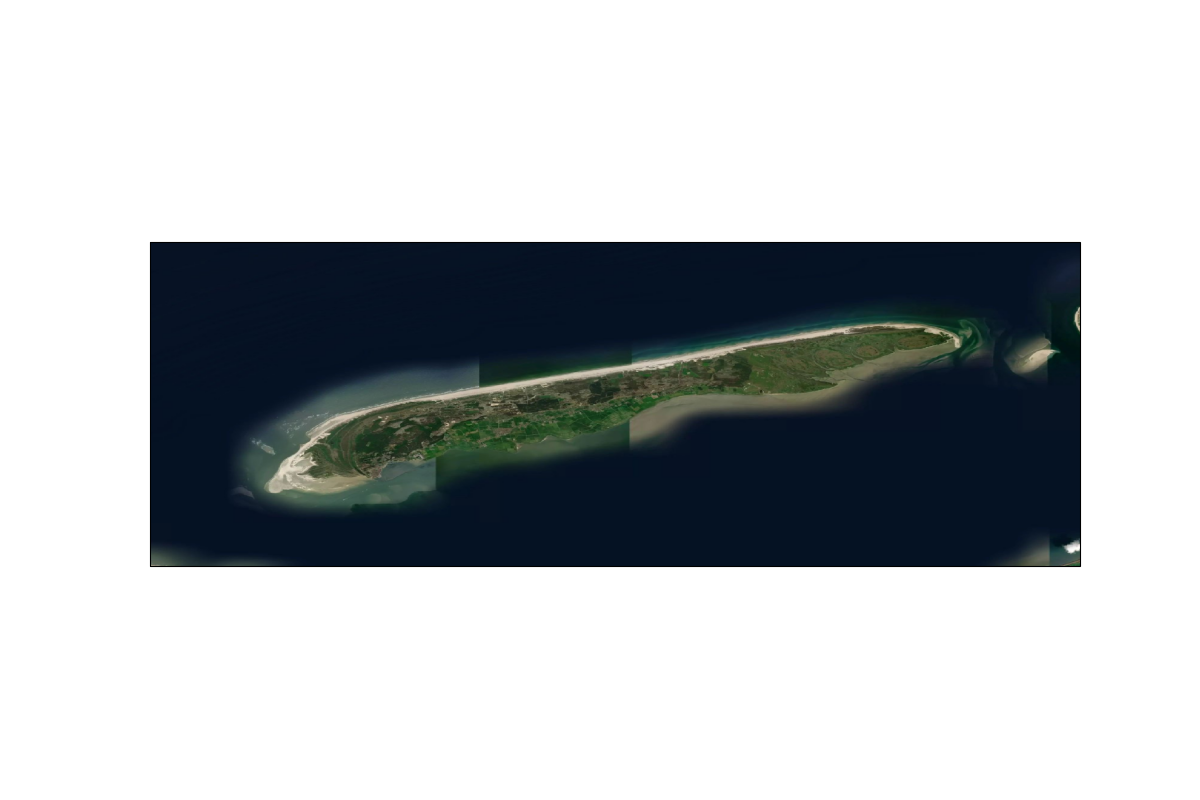

In [15]:
bg = cimgt.OSM()
bg = cimgt.MapboxTiles(map_id='satellite-v9',
                           access_token='pk.eyJ1IjoiZ3ZhbmhlbWVydCIsImEiOiJjbGZjOGk2dTEyZzNwM3RvNDd6bTd5c3k0In0.DU6aaEHO0crAXUDN-ypq1g')

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.set_extent([bottom_left[0], top_right[0], bottom_left[1], top_right[1]])
ax.add_image(bg, 11)
plt.show()
plt.savefig(data_dir.joinpath('terschelling-sat2.png'), bbox_inches='tight', pad_inches=0)